## Assignment 1
- GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population _mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- Describe the behavior you see in the plots in terms of the law of large numbers.
- PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
Extra Credit: FIT a gaussian to the distribution of means            

### Index of all figures:
#### 1. Chi-square distribution
Fig. 1.1 Random-generated chi-square distribution                                                         
Fig. 1.2 100 means of chi-square distributions                                                         
Fig. 1.3 Distribution of 100 means of chi-square distributions                                      
Fig. 1.4 Probability density of 100 means of chi-square distributions
#### 2. Normal distribution
Fig. 2.1 Random-generated normal distribution                                                         
Fig. 2.2 100 means of normal distributions                                                         
Fig. 2.3 Distribution of 100 means of normal distributions                                            
Fig. 2.4 Probability density of 100 means of normal distributions                                               
#### 3. Poisson distribution
Fig. 3.1 Random-generated poisson distribution                                                       
Fig. 3.2 100 means of poisson distributions                                                               
Fig. 3.3 Distribution of 100 means of poisson distributions                                              
Fig. 3.4 Probability density of 100 means of poisson distributions                                             
#### 4. Binomial distribution
Fig. 4.1 Random-generated binomial distribution                                                            
Fig. 4.2 100 means of binomial distributions                                                               
Fig. 4.3 Distribution of 100 means of binomial distributions                                               
Fig. 4.4 Probability density of 100 means of binomial distributions                                       
#### 5. Do it for another distribution: Laplace distribution
Fig. 5.1 Random-generated laplace distribution                                                         
Fig. 5.2 100 means of laplace distributions                                                            
Fig. 5.3 Distribution of 100 means of laplace distributions                                                  
Fig. 5.4 Probability density of 100 means of laplace distributions                                           
#### 6. Extra Credit: FIT a gaussian to the distribution of means
Fig. 6.1 Probability density of 500 means       

In [1]:
%matplotlib inline
from __future__ import print_function
__author__= 'fbb and Lingyi'

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.optimize import curve_fit, minimize
# for plotting the gaussian to the distribution of means
from scipy.stats import norm, laplace

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# set a number to seed so that same random data generated each time
np.random.seed(567835)

## 1. Chi-square distribution

In [3]:
# set a mean
mymean = 100

# chi-square distribution: takes the number of degrees of freedom, degrees of freedom = mean
df = mymean

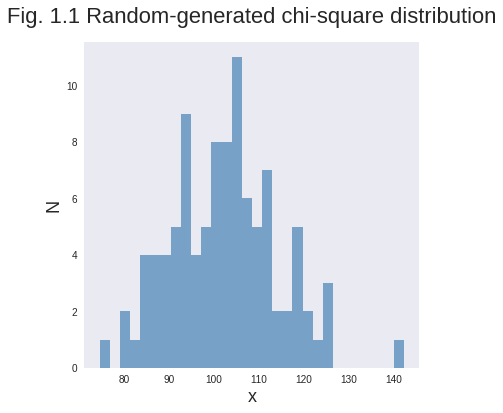

In [4]:
# md is an empty disctionary to host the distributions
md = {}

md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['chisq'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 1.1 Random-generated chi-square distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

### Fig. 1.1: Chi sq distribution: df = 100, N=100

In [5]:
# calculate what the mean and stdev of this distribution
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 102.40, standard deviation: 11.94


In [6]:
# generate 100 different sizes between 10 and 2000
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[ 56 289 983 576 115  12 521 908 302 599 843 412 538 888 907  29 594 100
 473 497 488 264 907 462 523 507  71 729 968 892  81 836 369 102 813  37
 701 501 792 523 580 640 969 237 368 148 330  18 329  29 152 127 264 134
 649 177  89  61 336 380 593 100 849 666 641 404  93 448 241 504 343  35
 368 846 341 962 376 991 246 405 297 240 334 664  28 900 602  74 332 365
 987 806 560 472 994 818 259 526 197 678] (100,)


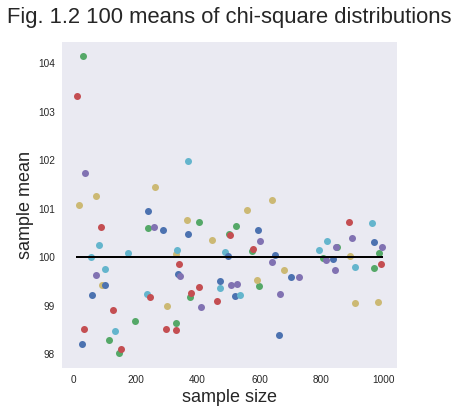

In [7]:
# store the sizes and means in dict
md['chisq'] = {} 

# and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    
md['chisq']['means'] = {}

# plot the figure
axchisq_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 1.2 100 means of chi-square distributions', fontsize=22, y=1.04)
plt.show()

## What I see in this figure: The sample mean gets closer to population mean when the sample sizes get larger.

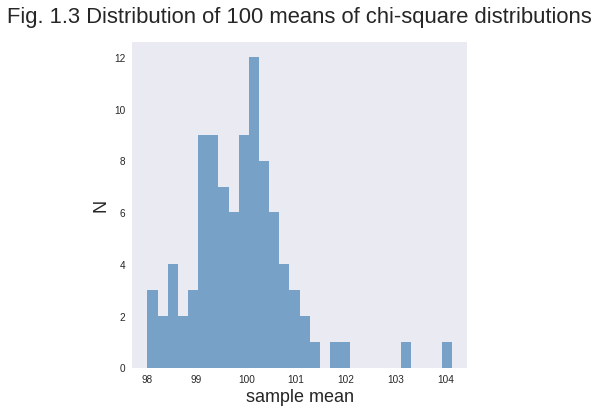

In [8]:
allmeansC = list(md['chisq']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansC,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 1.3 Distribution of 100 means of chi-square distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

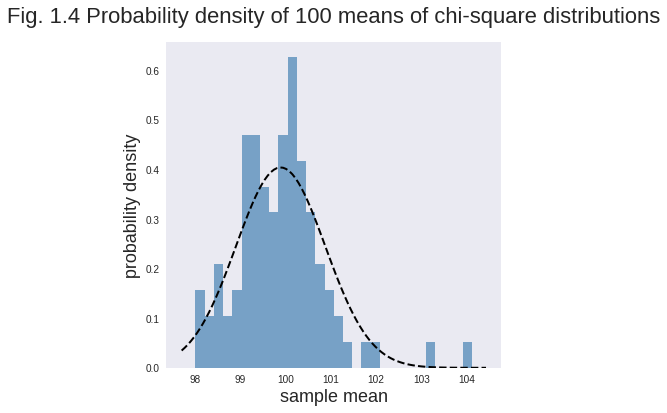

In [9]:
# fit a gaussian to the distribution of means of chi-square distributions
meanFormean = np.mean(allmeansC)
stdFormean = np.std(allmeansC)

plt.figure(figsize=(6,6))
plt.hist(allmeansC, bins=30, normed=True, color='SteelBlue', alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 1.4 Probability density of 100 means of chi-square distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 2. Normal distribution


In [10]:
# set a mean
mymean = 100

#set the standard deviation
mystd = 10

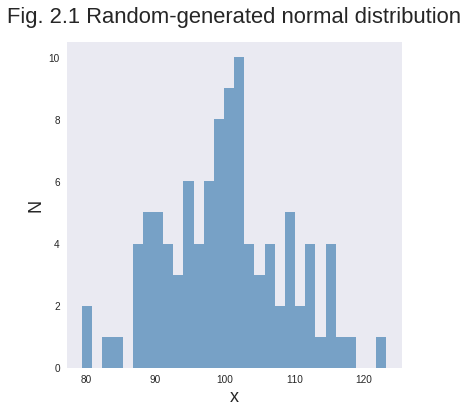

In [11]:
md['lnorm'] = np.random.normal(mymean, mystd, size=100)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['lnorm'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 2.1 Random-generated normal distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [12]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Normal mean: 100.01, standard deviation: 8.76


In [13]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[415 802 369 501 547 569  50 156 388 570 979 566 970 260 431 184 781 659
 385 566 415 735 835 277 952 160 943 875  28 761 275 274 865 201 738 101
 111 407 176 602 749 833  12 232  56 699 609 553 853 646 311 833 620   4
  18  32 348 246 661 300  16  96  41 895 101 617 180 728  56 275 880 534
 659 225 568 661 822 138 204 468 771 559 649 994 447 304 125 913 212 916
 711 191 636 803 831 808 728 126 198 659] (100,)


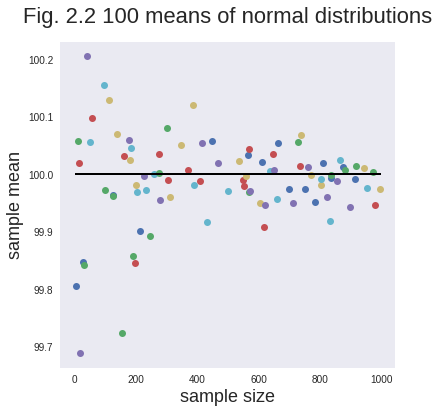

In [14]:
md['lnorm'] = {} 
for n in mysize:
    md['lnorm'][n] = np.random.normal(mymean, size = n)
md['lnorm']['means'] = {}

# plot the figure
axlnorm_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 2.2 100 means of normal distributions', fontsize=22, y=1.04)
plt.show()

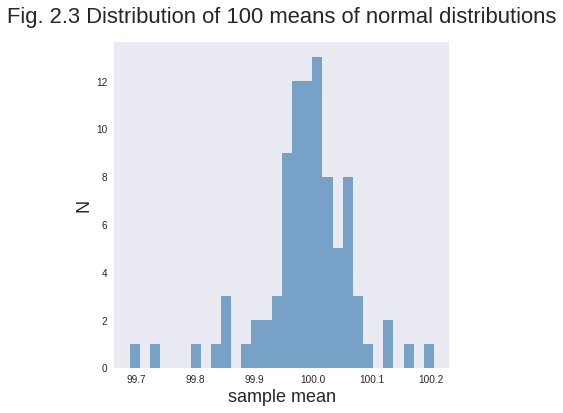

In [15]:
allmeansN = list(md['lnorm']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansN, bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 2.3 Distribution of 100 means of normal distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

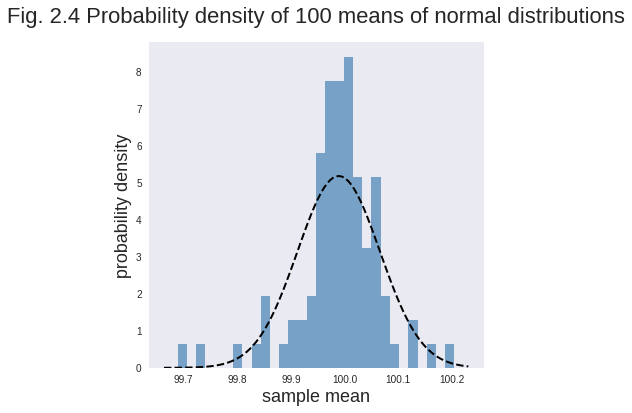

In [16]:
meanFormean = np.mean(allmeansN)
stdFormean = np.std(allmeansN)

plt.figure(figsize=(6,6))
plt.hist(allmeansN, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)

# plot the figure
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 2.4 Probability density of 100 means of normal distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 3. Poisson distribution

In [17]:
# set the expectation of interval
lam = 100

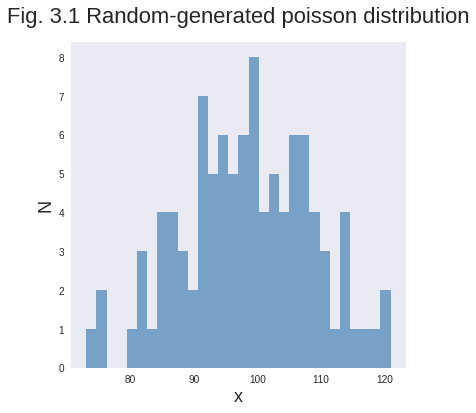

In [18]:
md['pois'] = np.random.poisson(lam, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['pois'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 3.1 Random-generated poisson distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [19]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 98.36, standard deviation: 10.23


In [20]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[126  84 435  50 304 965 363 711 618 840 109 555 659 302 615 522 493 855
 838 213 333 649 423  97 504 970 950 813 809 492 226 917 862 697 733 938
 340  60 291 838 864  46 400 854 454 948 191 827 345 954 825 819 666 570
 973 911 510 744 323 344 719 527 946 575 524 859 809 726 186 443 241 929
 587 431 936 996 785 274 567 397  14 529 789 829  18 391 701 964 322 221
   8 692 952 202 615 911 532 560 721 251] (100,)


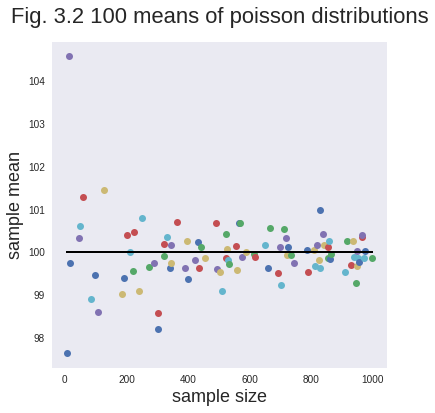

In [21]:
md['pois'] = {} 
for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
md['pois']['means'] = {}

# plot the figure
axpois_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 3.2 100 means of poisson distributions', fontsize=22, y=1.04)
plt.show()

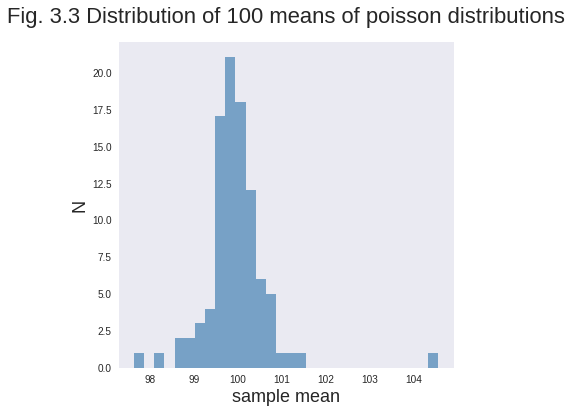

In [22]:
allmeansP = list(md['pois']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansP,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 3.3 Distribution of 100 means of poisson distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

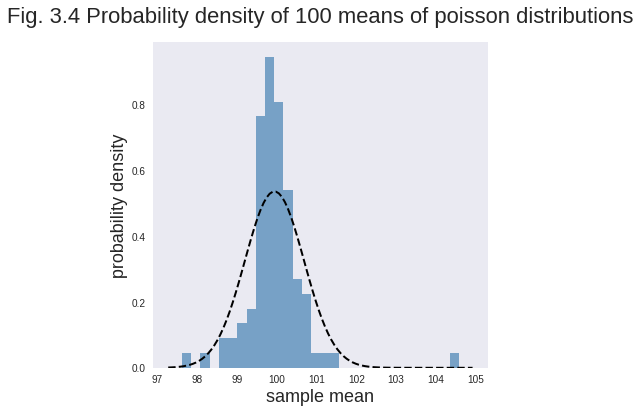

In [23]:
meanFormean = np.mean(allmeansP)
stdFormean = np.std(allmeansP)

plt.figure(figsize=(6,6))
plt.hist(allmeansP, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# the probability density function
p = norm.pdf(x, meanFormean, stdFormean)

# plot the figure
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 3.4 Probability density of 100 means of poisson distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 4. Binomial distribution

In [24]:
# set the trials and P
trials = 500
P = 0.2

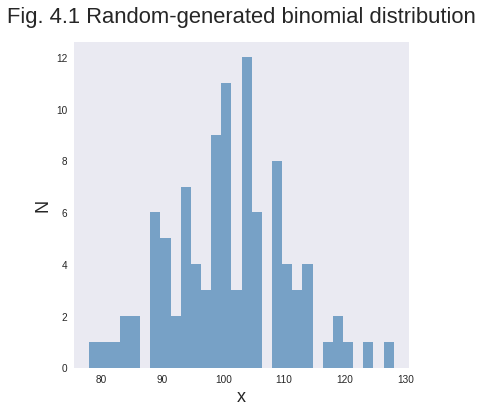

In [25]:
md['binomial'] = np.random.binomial(trials, P, size=100)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['binomial'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 4.1 Random-generated binomial distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [26]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 100.69, standard deviation: 9.55


In [27]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[717 596 247 710 874 478 316 365 406   5 148 474 461 965  68 969 376 456
 204 301 842  43 357 985 462 177  81 226  27 766 835  56 782  22 997 425
 519 298 444 831 450 615 868 692 525 261 861  79 520 173 333 954 292 105
 386 258 459 617 597 582 160 340 151 143 226 950 328 398 961 883 348 920
  56 926  89 697 124 394 957 484 873  28 261 797 929 190 510 918 386  78
 986 263 278 471  55 726 915 403 864 581] (100,)


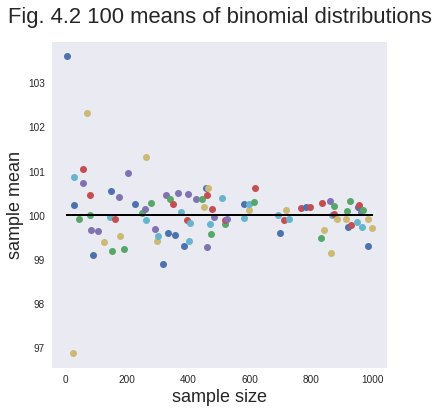

In [28]:
md['binomial'] = {} 
for n in mysize:
    md['binomial'][n] = np.random.binomial(trials, P, size = n)
md['binomial']['means'] = {}

# plot the figure
axbinomial_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 4.2 100 means of binomial distributions', fontsize=22, y=1.04)
plt.show()

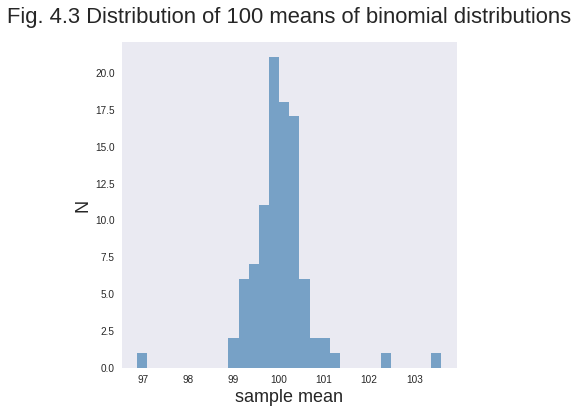

In [29]:
allmeansB = list(md['binomial']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansB,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 4.3 Distribution of 100 means of binomial distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

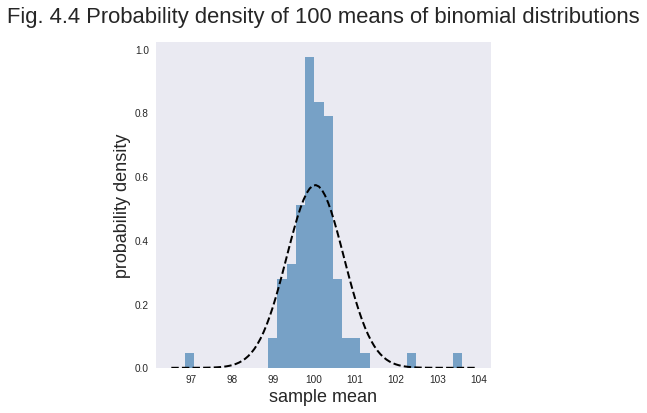

In [30]:
meanFormean = np.mean(allmeansB)
stdFormean = np.std(allmeansB)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansB, bins=30, normed=True, color='SteelBlue', alpha=0.7)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density function
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('probability density', fontsize = 18)
plt.title('Fig. 4.4 Probability density of 100 means of binomial distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

# 5. Do it for another distribution: Laplace distribution

In [31]:
# set mean and scale
mymean = 100
scale = 1.

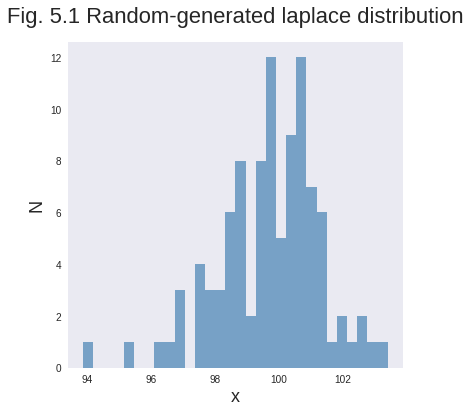

In [32]:
md['laplace'] = np.random.laplace(mymean, scale, size=100)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(md['laplace'], bins = 30, color='SteelBlue', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Fig. 5.1 Random-generated laplace distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

In [33]:
print ("laplace mean: %.2f, standard deviation: %.2f"%(md['laplace'].mean(), md['laplace'].std()))

laplace mean: 99.71, standard deviation: 1.60


In [34]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[772 973 636 224 946 978 471  27 217 556 783 601 554 487 144 793 391 580
 318 239 238 967 894 932  75 682 124  92 753 313  81 597 425 462 538 616
 468 680 361 196 255 637 965  35 498  75 147 236 234 828 368 778 516 298
 186 607 925 860  61 446 479  80 857 510 887 725 698 127 823 929  29 996
 927 419 470 553 874 834  93 118  65 591  51 892 141 285 285 536 182 535
 333 478 932 566 270 560 177 611 146 476] (100,)


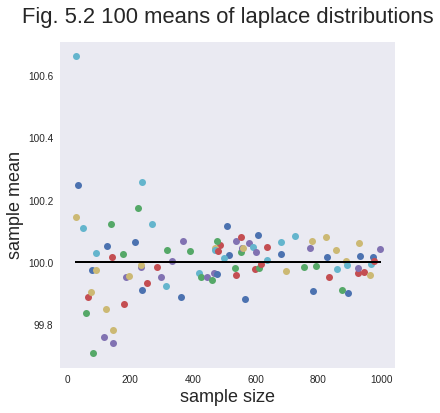

In [35]:
md['laplace'] = {} 
for n in mysize:
    md['laplace'][n] = np.random.laplace(mymean, scale, size = n)
md['laplace']['means'] = {}

# plot the figure
axlaplace_mu_n = plt.figure(figsize=(6,6)).add_subplot(111)
plt.grid(False)
for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        axlaplace_mu_n.plot(nn, md['laplace']['means'][nn], 'o')
        axlaplace_mu_n.set_xlabel('sample size', fontsize=18)
        axlaplace_mu_n.set_ylabel('sample mean', fontsize=18)
        axlaplace_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
plt.title('Fig. 5.2 100 means of laplace distributions', fontsize=22, y=1.04)
plt.show()

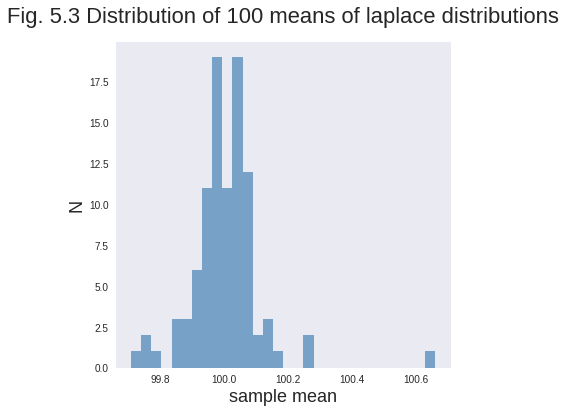

In [36]:
allmeansL = list(md['laplace']['means'].values())

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansL,bins=30, color='SteelBlue', alpha=0.7)
plt.xlabel('sample mean', fontsize = 18)
plt.ylabel('N', fontsize = 18)
plt.title('Fig. 5.3 Distribution of 100 means of laplace distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

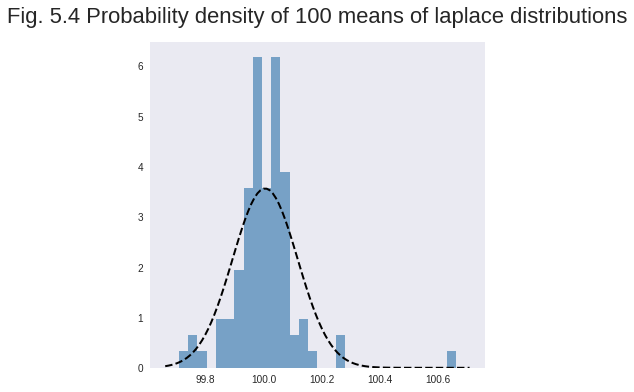

In [37]:
meanFormean = np.mean(allmeansL)
stdFormean = np.std(allmeansL)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeansL, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density functions
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.title('Fig. 5.4 Probability density of 100 means of laplace distributions', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

## 6. Extra Credit: FIT a gaussian to the distribution of means

In [38]:
# put all means in one list
allmeans = allmeansC + allmeansN + allmeansP + allmeansB + allmeansL

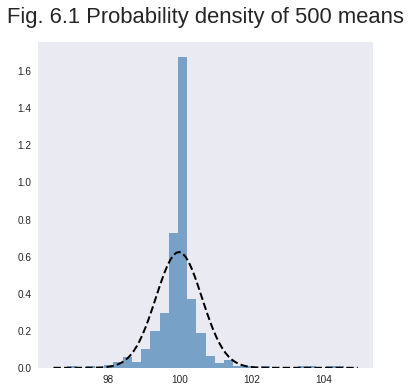

In [39]:
meanFormean = np.mean(allmeans)
stdFormean = np.std(allmeans)

# plot the figure
plt.figure(figsize=(6,6))
plt.hist(allmeans, bins=30, normed=True, color='SteelBlue', alpha=0.7)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#the probability density functions
p = norm.pdf(x, meanFormean, stdFormean)
plt.plot(x, p, 'k--', linewidth=2)
plt.title('Fig. 6.1 Probability density of 500 means', fontsize=22, y=1.04)
plt.grid(False)
plt.show()